In [90]:
import sys
assert sys.version_info >= (3, 5)
import numpy as np
import os

np.random.seed(42) # to allow stable runs

# To plot the pictures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Separate the Features and Label

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

- dataset - contains 7000 images with 784 features each, 28x28 = 784. The 2D image was flattened into a single row of 784 features


In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

- target - the labels (whether the image is what number from 1-10)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y.shape

(70000,)

# 2. Plots the first instance in the dataset

Saving figure 5


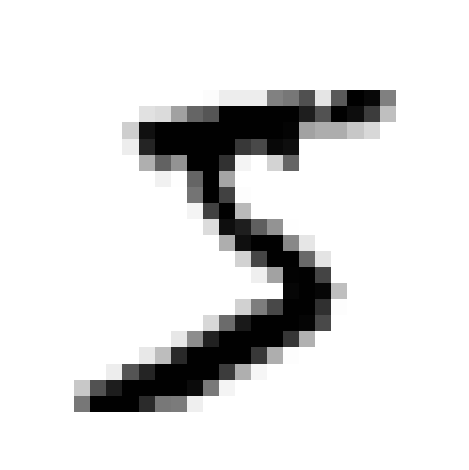

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0] # a single row with 784 features
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("5")
plt.show()

In [10]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
y[0] # The first instance in the label column is 5

'5'

# 3. Convert data type of Label into integer

In [12]:
y = y.astype(np.uint8)
y.dtype

dtype('uint8')

# 4. Split Data

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
X_train.shape # 60,000 rows as train data

(60000, 784)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
X_test.shape # 10,000 rows as test data

(10000, 784)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 5. Model Training

## 5.1 Binary Classification - 5, not 5

- For this binary classification, we only assume two results. Whether an instance will be five or not five

In [ ]:
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_test_5 = (y_test == 5)
y_test_5

array([False, False, False, ..., False,  True, False])

In [ ]:
y_train[y_train_5]

array([5, 5, 5, ..., 5, 5, 5], dtype=uint8)

In [ ]:
import pandas as pd

unique, values = np.unique(y_train, return_counts=True)

df = {'Classes' : unique,
      'Count' : values}
df = pd.DataFrame(df)
df['% of total'] = (df['Count'] / df['Count'].sum()) * 100
df

,Classes,Count,% of total
0,0,5923,9.871667
1,1,6742,11.236667
2,2,5958,9.930000
3,3,6131,10.218333
4,4,5842,9.736667
5,5,5421,9.035000
6,6,5918,9.863333
7,7,6265,10.441667
8,8,5851,9.751667
9,9,5949,9.915000


### SGD Classifier

- We use SGD Classifier as our model. Stochastic Gradient Descent is great in handling large datasets

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

#### .fit()

In [23]:
sgd_clf.fit(X_train, y_train_5) 

SGDClassifier(random_state=42)

#### .predict()

In [24]:
sgd_clf.predict([some_digit])

array([ True])

#### Cross validation

##### K-fold (Accuracy Score) (Not ideal for classifiers)

In [25]:
from sklearn.model_selection import cross_val_score

for id, score in enumerate(cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")):
    print(f'Fold {id + 1}: ', score)

Fold 1:  0.95035
Fold 2:  0.96035
Fold 3:  0.9604


##### Stratified K-Fold (Accuracy Score) (Not ideal for classifiers)

In [26]:
# Stratified Kfold allows cross-validation with equal partitions of each class in the dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Call out the function
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [27]:
# For every iteration/fold, it creates a clone of the model, and fit the model to that train data fold. 
# Then, we compute the accuracy
# by dividing the correct predictions with the total no. of predictions
i = 1
for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    # a clone classifier
    clone_clf = clone(sgd_clf)

    # train data_k
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]

    # test data_k
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # fit data to model
    clone_clf.fit(X_train_folds, y_train_folds)

    # predict y_hat
    y_pred = clone_clf.predict(X_test_fold)

    # How many in the y_hat == y_test_fold
    n_correct = sum(y_pred == y_test_fold)

    print(f'Fold {i}: {n_correct / len(y_pred)}')
    i += 1

Fold 1: 0.9669
Fold 2: 0.91625
Fold 3: 0.96785


##### Confusion Matrix 

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # y_hat

In [29]:
y_train_pred # of shape (60000,)

array([ True, False, False, ...,  True, False, False])

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred) # remember that y_train_5 is also an array of bool values of shape (60000,)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

##### Precision / Recall Score

In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

##### Precision / Recall Tradeoff

In [33]:
# We use decision function to get the score instead of a binary value 0, 1
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [34]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred # Because the score of the instance is greater than the threshold, it was classified to be true (a 5)

array([ True])

In [35]:
threshold = 8000 # if we set a high threshold, then it will classify it as false because your y_score is only 2164.220...
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

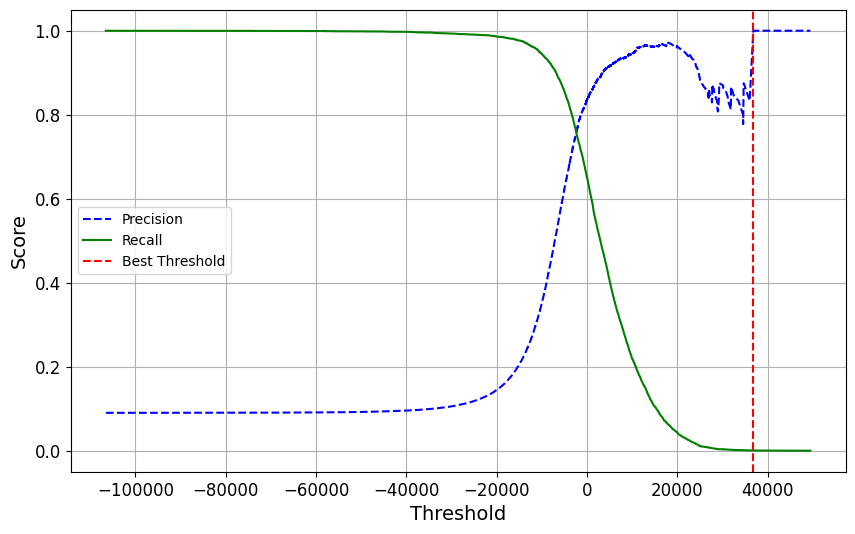

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    best_threshold = thresholds[precisions[:-1].argmax()]
    plt.axvline(x=best_threshold, color='r', linestyle='--', label='Best Threshold')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [39]:
precisions

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [40]:
np.argmax(precisions >= 0.90) # returns the index of the highest precision in our precision curve

57075

In [41]:
# In this case, we want to choose a threshold that will give us a 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision # If we set the threshold to this, we will be able to get a 90% precision

3370.0194991439557

In [42]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [43]:
# We were able to achieve a precision score of 90%
print(f"Recall Score: {recall_score(y_train_5, y_train_pred_90)}")
print(f"Precision Score: {precision_score(y_train_5, y_train_pred_90)}")

Recall Score: 0.4799852425751706
Precision Score: 0.9000345901072293


##### ROC AUC Score

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

##### F1 Score

In [46]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

#### .fit()

In [48]:
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier(random_state=42)

#### .predict()

In [49]:
forest_clf.predict([some_digit])

array([ True])

#### .predict_proba()

In [ ]:
forest_clf.predict_proba([some_digit])

#### Cross Validation

##### K-Fold (Probability Score)

In [50]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba") # proba values
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

##### K-Fold (Binary Prediction)

In [ ]:
y_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
y_forest_pred

array([ True, False, False, ...,  True, False, False])

##### Precision / Recall Score

In [52]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_forest_pred)

0.9905083315756169

In [53]:
recall_score(y_train_5, y_forest_pred)

0.8662608374838591

##### ROC AUC Score

In [54]:
# ROC AUC requires scores. 
# RandomForest outputs probabilities so we need to convert it into scores. 
# One way to do this is to use the proba of positive instances as scores 
y_scores_forest = y_probas_forest[:, 1]

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

##### F1 Score

In [55]:
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(y_train_5, y_forest_pred)}")

F1 Score: 0.9242275142688446


### Model Selection

- We have shortlisted the Random Forrest Classifier to be the best model.

#### Save Model

In [93]:
import pickle
import os

with open(os.path.join("models", "Digit_Classifier_Binary_Clf.pkl"), 'wb') as file:
    pickle.dump(forest_clf, file)

#### Import Model

In [5]:
import pickle

with open(os.path.join("models", "Digit_Classifier_Binary_Clf.pkl"), 'rb') as file:
    model = pickle.load(file)

#### Test Model

In [1]:
import os
import numpy as np
from PIL import Image

def load_images_from_directory(directory, target_size=(28, 28)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize(target_size)  # Resize image to target size (28, 28)
            img_array = np.array(img).flatten()  # Flatten from 2D to 1D (1, 784)
            img_array = 255 - img_array  # Invert the pixel values so that whites are 0 (Feature Scaling)
            images.append(img_array)
    return np.array(images)

images_array = load_images_from_directory("images/test")

In [2]:
image = images_array[0] # (1 row, 784 features)
image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  21,  16,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  32,  42,  37,  63, 118, 178, 231, 216,  36,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   4, 203, 249, 248, 255, 255, 255, 255, 255,
        91,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  32, 245, 255, 251, 221, 189, 153,
       106,  72,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  77, 255, 237,  6

In [3]:
image.shape

(784,)

In [7]:
images_array.shape

(2, 784)

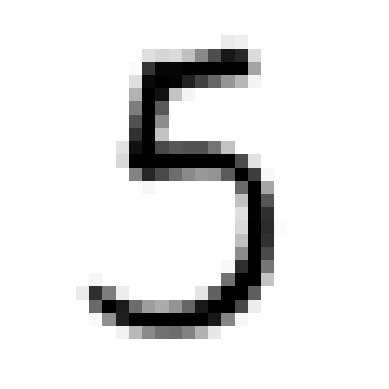

In [ ]:
image = image.reshape(28, 28)
plt.imshow(image, cmap = mpl.cm.binary)
plt.axis("off")
plt.show()

In [8]:
model.predict([images_array[0]]) # as you can see, the new picture is predicted correctly

array([ True])

In [97]:
model.predict_proba([images_array[0]])

array([[0.19, 0.81]])

In [88]:
image = images_array[1] # a single row with 784 features. (1, 784)
image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  77, 221,
       100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

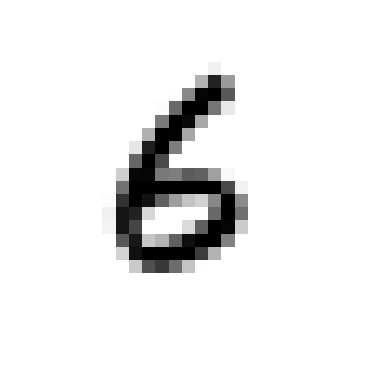

In [ ]:
image = image.reshape(28, 28)
plt.imshow(image, cmap = mpl.cm.binary)
plt.axis("off")
plt.show()

In [98]:
model.predict([images_array[1]]) # as you can see, correctly predicted as false

array([False])

In [99]:
model.predict_proba([images_array[1]])

array([[0.97, 0.03]])

## 5.2 Multiclass Classification - 0 to n

### SGD Classifier (One Versus All)

In [100]:
from sklearn.linear_model import SGDClassifier

In [101]:
sgd_clf = SGDClassifier(random_state=40)

#### .fit()

In [102]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=40)

#### .predict()

In [103]:
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

#### .decision_function()

In [104]:
some_digit_scores = sgd_clf.decision_function([some_digit]) # Returns the scores of image 1 falling to each class (0-9)
some_digit_scores

array([[-28206.21839161, -36489.76547769,  -7548.33084091,
         -1581.10692853, -14984.06283472,   1485.90912035,
        -19177.65689963, -15717.26054423, -13627.36406215,
        -15029.45563461]])

In [105]:
np.argmax(some_digit_scores) # index 5 has the highest score, thus, the image is digit 5

5

#### .classes_

In [106]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Cross Validation

##### K-Fold (Accuracy Score)

In [107]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8516 , 0.8698 , 0.83695])

### SGD Classifier (One versus One)

In [112]:
# SGD Classifier automatically runs OVA so in this case, we forced it to do OVO
from sklearn.multiclass import OneVsOneClassifier

In [113]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=40))

#### .fit()

In [114]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=40))

#### .predict()

In [115]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

#### .decision_function()

In [116]:
ovo_clf.decision_function([some_digit])

array([[ 2.66666692,  3.66666708,  5.3333328 ,  8.33333319,  1.66666687,
         9.33333318, -0.33333318,  3.66666803,  4.33333283,  6.33333234]])

#### .estimators_

In [117]:
len(ovo_clf.estimators_) # N x (N-1) / 2, this OVO Classifier trained 45 classifiers (0 vs. 1, 0 vs. 2...)

45

### Random Forest (no need to OVO and OVA)

#### .fit()

In [118]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### .predict()

In [119]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

#### .predict_proba()

In [120]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

### Model Selection

#### Save model

In [ ]:
import pickle as pkl

with open(os.path.join("models", "Digit_Classifier_Multiclass_Clf.pkl"), "wb") as file:
    pkl.dump(sgd_clf, file)

#### Import Model

In [109]:
with open(os.path.join("models", "Digit_Classifier_Multiclass_Clf.pkl"), 'rb') as file:
    model = pickle.load(file)

#### Test model

In [ ]:
model.predict([images_array[0]])

array([5], dtype=uint8)

In [128]:
model.decision_function([images_array[0]])

array([[-27457.76820012, -29923.29160635, -14685.48124633,
         -3853.49580913, -17925.18710199,  -1731.8664569 ,
        -19197.62105233, -35002.53957705, -12536.77476505,
        -28462.28398263]])

In [124]:
model.predict([images_array[1]])

array([4], dtype=uint8)

In [ ]:
# as you can see, the model is struggling to make accurate predictions for number 4
model.decision_function([images_array[1]])

array([[-25217.37264779, -12185.602056  ,  -2434.28278676,
        -16252.38708459,   3686.80326986,  -4460.94294907,
          1063.97474862, -12126.79431446,   1157.30419349,
          3297.24634992]])

# 5.3 Multilabel Classification - [True/False, 1/0, ...]

## K Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

In [91]:
y_train_large = (y_train >= 7) # instances greater than or equal to 7
y_train_odd = (y_train % 2 == 1) # instances that are odd
y_multilabel = np.c_[y_train_large, y_train_odd]

In [92]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

#### .fit()

In [93]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(n_neighbors=4, weights='distance')

#### .predict()

In [ ]:
knn_clf.predict([some_digit]) # Is it >= 7? False, Is it odd? True. Thus, the label is [False, True]

array([[False,  True]])

#### Cross Validation

##### F1 Score

In [ ]:
y_train_knn_predict = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_predict, average='macro') # using macro assumes that all labels are equally important. If that's not the case, we can use "weighted" as an average method

np.float64(0.9786580239202405)